### 1. 股票数据获取
#### 1.1 方法一
Python库：pandas-datareader
https://pandas-datareader.readthedocs.io/en/latest/

Python库：yfinance（没有提供一种方法来抓取雅虎财经上可用的任何新闻报道/分析，不适用于构建依赖于情感分析的模型）
可以访问雅虎财经上可用的财务数据

https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
code_Dict = {'阿里巴巴': 'BABA', '京东': 'JD', '沃尔玛': 'WMT', '亚马逊': 'AMzN', '易贝': 'EBAY'}
start_date = '2020-01-01'
end_date = '2022-03-20'

babaDf = data.get_data_yahoo(code_Dict['阿里巴巴'], start_date, end_date)
babaDf.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,213.639999,210.729996,212.000000,212.100006,6773600,212.100006
2020-01-02,219.979996,216.539993,216.600006,219.770004,15873500,219.770004
2020-01-03,218.203003,216.009995,216.350006,217.000000,8604500,217.000000
2020-01-06,217.160004,214.089996,214.889999,216.639999,11885500,216.639999
2020-01-07,218.940002,216.690002,217.639999,217.630005,9388000,217.630005


In [3]:
babaDf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,559.000000,559.000000,559.000000,559.000000,5.590000e+02,559.000000
mean,212.058761,206.333499,209.439487,209.246172,2.049589e+07,209.246172
std,52.330072,51.804561,52.232685,52.141311,1.423448e+07,52.141311
min,80.139999,73.279999,75.099998,76.760002,6.231400e+06,76.760002
25%,175.129997,169.639999,174.125000,172.175003,1.314065e+07,172.175003
50%,216.600006,212.630005,215.229996,215.279999,1.721240e+07,215.279999
75%,251.699997,244.250000,247.209999,248.790001,2.254405e+07,248.790001
max,319.320007,308.910004,313.500000,317.140015,1.598343e+08,317.140015


In [4]:
from matplotlib import pylab

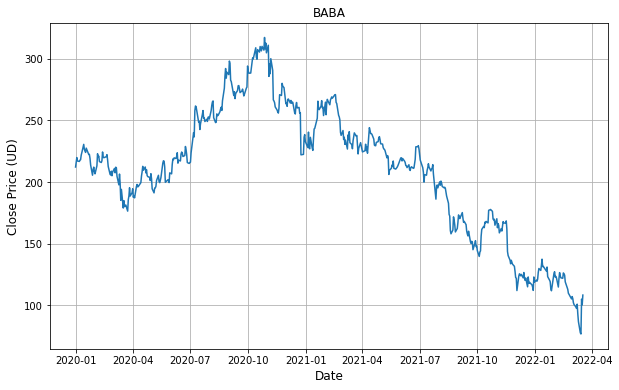

In [5]:
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)
plt.plot(babaDf['Close'])
plt.title('BABA')
plt.grid(True)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (UD)', fontsize=12)
plt.show()

In [6]:
# 特征工程
def change(column):
    buyPrice=column[0]
    curPrice=column[column.size-1]
    # 累计涨跌幅
    priceChange=(curPrice-buyPrice)/buyPrice
    if(priceChange > 0):
        print('股票累计上涨=',priceChange)
    elif(priceChange == 0):
        print('股票累计没有变化=',priceChange)
    else:
        print('股票累计下跌=',priceChange)
    return priceChange
# 获取收盘价Close这一列的数据
closeCol = babaDf['Close']
# 调用函数，获取涨跌幅
babaChange = change(closeCol)

股票累计下跌= -0.48939179662775734


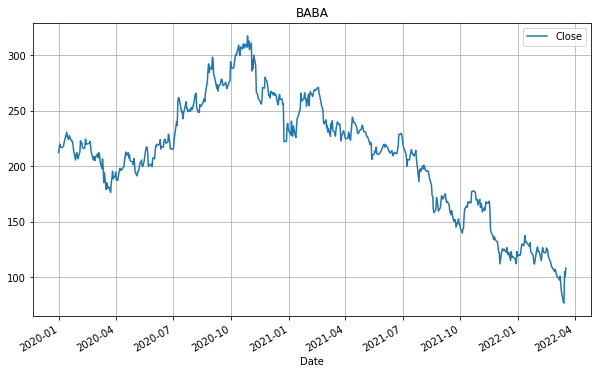

In [7]:
%matplotlib inline 
pylab.rcParams['figure.figsize']=(10,6) # 改变大小plot
babaDf["Close"].plot(grid=True)   # 调整后的收盘价
# plt.plot(label='baba')
plt.title('BABA')
plt.legend()
plt.show()

#### 1.2 方法二：爬虫

In [8]:
import random
import time
from requests import get, RequestException
import json
import pandas as pd

In [9]:
user_agent_list = [
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.71 Safari/537.1 LBBROWSER',
    'Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)',
    'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.84 Safari/535.11 SE 2.X MetaSr 1.0',
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Maxthon/4.4.3.4000 Chrome/30.0.1599.101 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.122 UBrowser/4.0.3214.0 Safari/537.36'
]

referer_list = [
    'http://fund.eastmoney.com/',
    'http://fund.eastmoney.com/000689.html?spm=search',
    'http://fund.eastmoney.com/000689.html'
]

def get_html(baseUrl):
    # 获取一个随机User_Agent和Referer
    headers = {'User-Agent': random.choice(user_agent_list), 'Referer': random.choice(referer_list)}
    try:
        resp = get(baseUrl, headers=headers)
        # print(resp.status_code)
        if resp.status_code == 200:
            return resp.text
        print("没有爬取到相应的内容")
        return None
    except RequestException:
        print("没有爬取到相应的内容")
        return None


if __name__ == "__main__":
    t = time.time()
    rt = int(round(t * 1000))
    # baseUrl = "http://api.fund.eastmoney.com/f10/lsjz?callback=jQuery18304333618836938051_1652531797219&fundCode=000689&pageIndex=1&pageSize=20&startDate=&endDate=&_=1652531797244"
    baseUrl = "http://api.fund.eastmoney.com/f10/lsjz?callback=jQuery18304333618836938051_1652531797219&fundCode=000689&pageIndex=1&pageSize=20&startDate=&endDate=&_=" + str(rt)
    data = get_html(baseUrl)
    print(data)

jQuery18304333618836938051_1652531797219({"Data":{"LSJZList":[{"FSRQ":"2022-05-13","DWJZ":"2.7360","LJJZ":"2.8460","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"1.15","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{"FSRQ":"2022-05-12","DWJZ":"2.7050","LJJZ":"2.8150","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"-0.16","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{"FSRQ":"2022-05-11","DWJZ":"2.7094","LJJZ":"2.8194","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"3.79","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{"FSRQ":"2022-05-10","DWJZ":"2.6105","LJJZ":"2.7205","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"3.57","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{"FSRQ":"2022-05-09","DWJZ":"2.5204","LJJZ":"2.6304","SDATE":null,"ACTUALSYI":"","NAVTYPE":"1","JZZZL":"-0.08","SGZT":"限制大额申购","SHZT":"开放赎回","FHFCZ":"","FHFCBZ":"","DTYPE":null,"FHSP":""},{

In [10]:
import re

# 将结果格式化一下 留下有用的字符串部分
res = re.findall(r'\{.*\}',data)
# 将一个json对象（str）转化为相对应的python对象
jsonText = json.loads(res[0])
jsonText

{'Data': {'LSJZList': [{'FSRQ': '2022-05-13',
    'DWJZ': '2.7360',
    'LJJZ': '2.8460',
    'SDATE': None,
    'ACTUALSYI': '',
    'NAVTYPE': '1',
    'JZZZL': '1.15',
    'SGZT': '限制大额申购',
    'SHZT': '开放赎回',
    'FHFCZ': '',
    'FHFCBZ': '',
    'DTYPE': None,
    'FHSP': ''},
   {'FSRQ': '2022-05-12',
    'DWJZ': '2.7050',
    'LJJZ': '2.8150',
    'SDATE': None,
    'ACTUALSYI': '',
    'NAVTYPE': '1',
    'JZZZL': '-0.16',
    'SGZT': '限制大额申购',
    'SHZT': '开放赎回',
    'FHFCZ': '',
    'FHFCBZ': '',
    'DTYPE': None,
    'FHSP': ''},
   {'FSRQ': '2022-05-11',
    'DWJZ': '2.7094',
    'LJJZ': '2.8194',
    'SDATE': None,
    'ACTUALSYI': '',
    'NAVTYPE': '1',
    'JZZZL': '3.79',
    'SGZT': '限制大额申购',
    'SHZT': '开放赎回',
    'FHFCZ': '',
    'FHFCBZ': '',
    'DTYPE': None,
    'FHSP': ''},
   {'FSRQ': '2022-05-10',
    'DWJZ': '2.6105',
    'LJJZ': '2.7205',
    'SDATE': None,
    'ACTUALSYI': '',
    'NAVTYPE': '1',
    'JZZZL': '3.57',
    'SGZT': '限制大额申购',
    'SHZT': '开

In [11]:
# 保存或使用数据
# CSV/EXCEL + Pandas
infos = jsonText['Data']['LSJZList']

for info in infos:
    FSRQ = info['FSRQ']    # 日期
    DWJZ = info['DWJZ']    # 单位净值
    LJJZ = info['LJJZ']    # 累计净值
    JZZZL = info['JZZZL']  # 增长率
    print(FSRQ, JZZZL)

2022-05-13 1.15
2022-05-12 -0.16
2022-05-11 3.79
2022-05-10 3.57
2022-05-09 -0.08
2022-05-06 -1.34
2022-05-05 0.22
2022-04-29 4.03
2022-04-28 -0.93
2022-04-27 8.31
2022-04-26 -3.43
2022-04-25 -7.12
2022-04-22 -0.54
2022-04-21 -3.53
2022-04-20 -3.28
2022-04-19 -0.24
2022-04-18 2.55
2022-04-15 -0.88
2022-04-14 0.40
2022-04-13 -1.85


In [1]:
infosLit = []
indexList = []
titleList = ['FSRQ', 'DWJZ', 'ljjz', 'jzzzl']

for info in infos:
    FSRQ = info['FSRQ']    # 日期
    DWJZ = info['DWJZ']    # 单位净值
    LJJZ = info['LJJZ']    # 累计净值
    JZZZL = info['JZZZL']  # 增长率

    indexList.append(FSRQ)

    temList = []
    temList.append(FSRQ)
    temList.append(float(DWJZ))
    temList.append(DW)

NameError: name 'infos' is not defined